In [1]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
#import sklearn.externals
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

### Models in Use

- A decision tree represents a series of conditional steps that you’d need to take in order to make a decision.

- Random forests use the concept of collective intelligence: An intelligence and enhanced capacity that emerges when a group of things work together. To achieve its aim, a bunch of decision trees are built independently and then the aggregate of all the outputs are taken to arrive at a single decision.

- Random forest is an ensemble of decision trees.

- A disadvantage of random forests is that they’re harder to interpret than a single decision tree. They’re also slower to build since random forests need to build and evaluate each decision tree independently.

- Decision trees are typically the weak learners in gradient boosting and consequently, the technique is sometimes referred to as gradient tree boosting.  

- Like random forests, we also have gradient boosting. Popular algorithms like XGBoost and CatBoost are good examples of using the gradient boosting framework. In essence, gradient boosting is just an ensemble (a collection) of weak predictors, which are usually decision trees.

- Gradient boosting (derived from the term gradient boosting machines) is a popular supervised machine learning technique for regression and classification problems that aggregates an ensemble of weak individual models to obtain a more accurate final model. 

- Ensembles are constructed from decision tree models. Trees are added one at a time to the ensemble and fit to correct the prediction errors made by prior models. This is a type of ensemble machine learning model referred to as boosting.

- Catboost: CatBoost is based on gradient boosted decision trees. During training, a set of decision trees is built consecutively. Each successive tree is built with reduced loss compared to the previous trees.

- XGBoost is an efficient implementation of gradient boosting that can be used for regression predictive modeling. Extreme Gradient Boosting, or XGBoost for short, is an efficient open-source implementation of the gradient boosting algorithm.

- Accuracy is a method for measuring a classification model’s performance. It is typically expressed as a percentage.  Accuracy is the count of predictions where the predicted value is equal to the true value.

- A loss function, also known as a cost function, tells us the uncertainty of a prediction based on how much the prediction varies from the true value. This gives us a more nuanced view into how well the model is performing. 



**References:** 
- [Further for Random Forests, Decision Trees and Gradient Boosting](https://towardsdatascience.com/decision-trees-random-forests-and-gradient-boosting-whats-the-difference-ae435cbb67ad)
- [All about CatBoostReressor with usage cases](https://catboost.ai/en/docs/concepts/python-usages-examples)

In [2]:
df = pd.read_csv("ml_television.csv")

In [3]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,ppi
0,Apple,Ultrabook,Intel Core i5,8,128,Intel,mac OS,1.37,71378.6832,4.21
1,Apple,Ultrabook,Intel Core i5,8,128,Intel,mac OS,1.34,47895.5232,2.98
2,HP,Notebook,Intel Core i5,8,256,Intel,Other OS,1.86,30636.0000,1.98
3,Apple,Ultrabook,Intel Core i7,16,512,AMD,mac OS,1.83,135195.3360,3.64
4,Apple,Ultrabook,Intel Core i5,8,256,Intel,mac OS,1.37,96095.8080,4.21


In [4]:
X = df.drop(["Price", "Weight"], axis=1)
y = np.log(df["Price"])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=45)

### CatBoostRegression Model

For catboost regression model, we have to observe the following for it to function prperly.
- declare categorical featurs
- create a odel instance of catboostregressor
- fit the model to our instance
- get the score
- predict on X_test
- get RMSE
- Try predicting on a random sample

In [6]:
cat_feat = ["Company", "TypeName", "Cpu", "Gpu", "OpSys"]

In [7]:
regressor = CatBoostRegressor()

In [8]:
regressor.fit(X_train, y_train, cat_features=cat_feat, verbose=False)

In [9]:
regressor.score(X_test, y_test)

0.8602217798391847

In [10]:
pred_y = regressor.predict(X_test)

#### Getting the RMSE
The RMSE tends to calculate the average distance between the true scores and the predicted values. Thus, the smaller the RMSE, the lesser error our model is making in running the predictions.

In [11]:
def rmse(pred, target):
    return np.sqrt(((pred - target) ** 2).mean())

In [12]:
regressor.predict(X.sample(1))

array([11.00239969])

In [13]:
rmse_val = rmse(np.array(pred_y), np.array(y_test))
print("rms error is: " + str(rmse_val))

rms error is: 0.22375230636855867


In [14]:
np.exp(rmse_val)

1.2507611754791397

### Saving Catboostregressor 

In [15]:
#joblib.dump(regressor, "cat_model.pkl")

['cat_model.pkl']

In [16]:
#joblib.dump(regressor, "cat_model.sav")

['cat_model.sav']

### Plotting the results

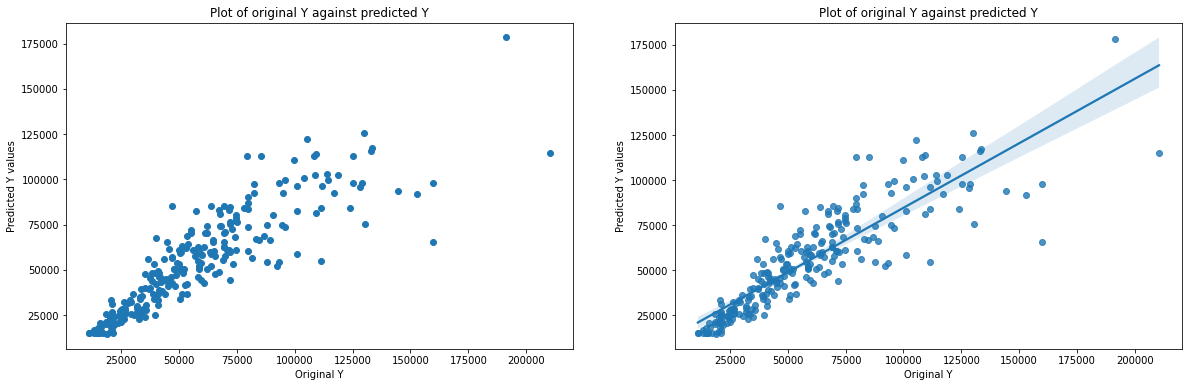

In [17]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
plt.scatter(np.exp(y_test), np.exp(pred_y))
plt.title("Plot of original Y against predicted Y")
plt.xlabel("Original Y")
plt.ylabel("Predicted Y values")

plt.subplot(1,2,2)
sns.regplot(x=np.exp(y_test), y=np.exp(pred_y));
plt.title("Plot of original Y against predicted Y")
plt.xlabel("Original Y")
plt.ylabel("Predicted Y values")

plt.show();
#plt.savefig('catboost_no_tuning.png')

In [18]:
regressor.feature_importances_

array([ 7.10217579, 15.87838552, 24.0584054 , 22.7007078 ,  6.06314684,
        5.47731944,  5.57258538, 13.14727384])

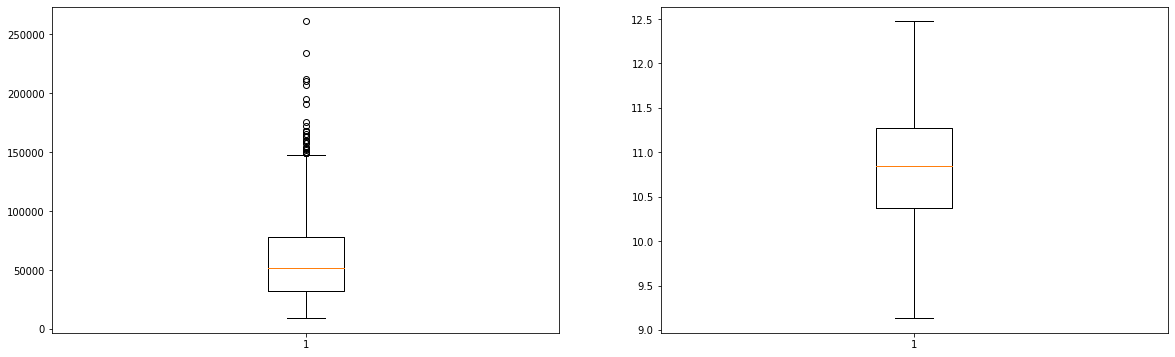

In [19]:
# plotting price without log
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
plt.boxplot(df.Price)

plt.subplot(1,2,2)
plt.boxplot(np.log(df.Price))
plt.show();
#plt.savefig('price_no_log.png')

### Improving the regression model
- Attend to the outliers (prices between 31000 and 49000)
- Normalize the memory column
- Deep dive into catboost hyperparameter tuning
- GridSearch/RandomSearch for best params
- Try a multi-transformer approach to chain everything together

#### On transformers and pipelines
- [docs](https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html)
- [YouTube video](https://www.youtube.com/watch?v=irHhDMbw3xo)

Challenge is passing StandardScaler, OneHotEncoder and then the Model at once.

### Create transformer and pipeline for other models

### Ridge regression model

In [20]:
# create a column transformer object for ridge regressor
transform = make_column_transformer(
            (OneHotEncoder(), cat_feat),
            remainder="passthrough")

In [21]:
transform.fit_transform(X_train)

<1001x28 sparse matrix of type '<class 'numpy.float64'>'
	with 8008 stored elements in Compressed Sparse Row format>

In [22]:
ridge = Ridge()

In [23]:
pipeline = make_pipeline(transform, ridge)

In [24]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Company', 'TypeName', 'Cpu',
                                                   'Gpu', 'OpSys'])])),
                ('ridge', Ridge())])

In [25]:
pipeline.score(X_test, y_test)

0.7501201327253162

In [26]:
pred = pipeline.predict(X_test)

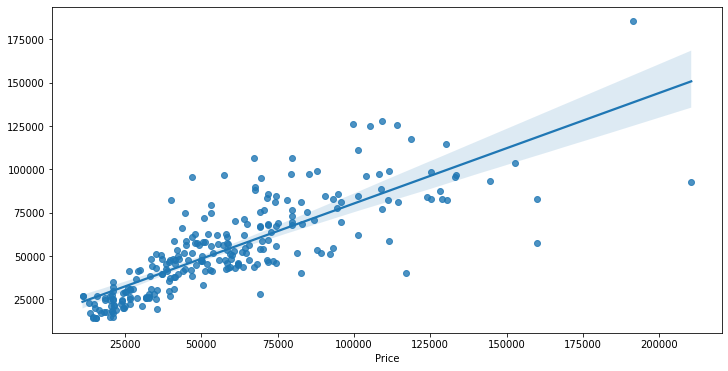

In [27]:
plt.figure(figsize=(12,6))
sns.regplot(x=np.exp(y_test), y=np.exp(pred));

### Creating a multiple column transformer to scale numeric values and also OHE strings

Creating scaled features for rideg regression to work on.

In [28]:
numeric_feat = ['Ram', 'Memory']

In [29]:
# fitting all scaling and ohe into one transformer column
feat_scaling = make_column_transformer(
                        (StandardScaler(), numeric_feat),
                        (OneHotEncoder(), cat_feat),
                    remainder = 'passthrough')

In [30]:
feat_scaling.fit_transform(X_train)

<1001x28 sparse matrix of type '<class 'numpy.float64'>'
	with 8008 stored elements in Compressed Sparse Row format>

In [31]:
ridge = Ridge()

In [32]:
# prediction on multi pipeline 
multi_pipe = make_pipeline(feat_scaling, ridge)

In [33]:
# fitting on the multi pipeline
multi_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['Ram', 'Memory']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Company', 'TypeName', 'Cpu',
                                                   'Gpu', 'OpSys'])])),
                ('ridge', Ridge())])

In [34]:
multi_pipe.score(X_test, y_test)

0.7650456386883302

In [35]:
multi_ridge = multi_pipe.predict(X_test)

In [36]:
rmse_ridge = rmse(np.array(y_test), np.array(multi_ridge))
print("rms error is: " + str(rmse_ridge))
np.exp(rmse_ridge)

rms error is: 0.2900945187299639


1.3365538114241986

### XGBRegressor for scaled values

In [37]:
regression = XGBRegressor(learning_rate = 0.1, n_estimators=1000, max_depth=2, eta=0.1, subsample=0.7, colsample_bytree=0.5)

In [38]:
xgb_pipeline = make_pipeline(feat_scaling, regression)

In [39]:
xgb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['Ram', 'Memory']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Company', 'TypeName', 'Cpu',
                                                   'Gpu', 'OpSys'])])),
                ('xgbregressor',
                 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample...
                              eval_metric=None, gamma=0, gpu_id=-1,
                              grow_policy='depthwise', importance_type=None,
                              interaction_constraints='', learning_rate=0.1,
                              max_bin=256, max_cat_to_onehot=4,
                              max_delta_step=0, max_depth=2, max_leaves=0,
                              min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=1000,
                              n_jobs=0, num_parallel_tree=1, predictor='auto',
                              random_state=0, reg_alpha=0, ...))])

In [40]:
xgb_pipeline.score(X_test, y_test)

0.8627874412736745

In [41]:
xgby = xgb_pipeline.predict(X_test)

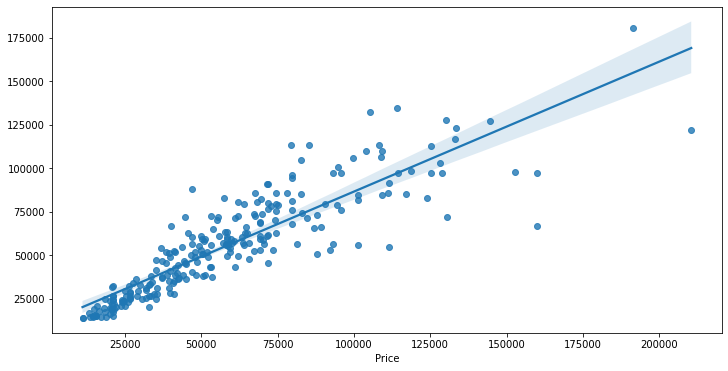

In [42]:
plt.figure(figsize=(12,6))
sns.regplot(x=np.exp(y_test), y=np.exp(xgby));

In [43]:
rmse_xgb = rmse(np.array(y_test), np.array(xgby))
print("rms error is: " + str(rmse_xgb))
np.exp(rmse_xgb)

rms error is: 0.22168928314038222


1.248183485952144

### Saving XGB Regressor

In [44]:
#joblib.dump(xgb_pipeline, "xgb_model.pkl")

['xgb_model.pkl']

In [45]:
#joblib.dump(xgb_pipeline, "xgb_model.sav")

['xgb_model.sav']